<a href="https://colab.research.google.com/github/SelvamathanS/Rnn-using-Mnist/blob/main/Mnist_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Original x_train shape:", x_train.shape)
print("Original y_train shape:", y_train.shape)
print("Original x_test shape:", x_test.shape)
print("Original y_test shape:", y_test.shape)

# 2. Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

print("\nNormalized pixel values range for x_train: ", np.min(x_train), "-", np.max(x_train))
print("Normalized pixel values range for x_test: ", np.min(x_test), "-", np.max(x_test))

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

print("\nReshaped x_train shape:", x_train.shape)
print("Reshaped x_test shape:", x_test.shape)

# 4. Convert the labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("\nOne-hot encoded y_train shape:", y_train.shape)
print("One-hot encoded y_test shape:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original x_train shape: (60000, 28, 28)
Original y_train shape: (60000,)
Original x_test shape: (10000, 28, 28)
Original y_test shape: (10000,)

Normalized pixel values range for x_train:  0.0 - 1.0
Normalized pixel values range for x_test:  0.0 - 1.0

Reshaped x_train shape: (60000, 28, 28)
Reshaped x_test shape: (10000, 28, 28)

One-hot encoded y_train shape: (60000, 10)
One-hot encoded y_test shape: (10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 3. Define the RNN model architecture
model = Sequential([
    SimpleRNN(128, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=False),
    Dense(num_classes, activation='softmax')
])

print("RNN Model Architecture:")
model.summary()


RNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,386 (83.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input

# 3. Define the RNN model architecture
model = Sequential([
    Input(shape=(x_train.shape[1], x_train.shape[2])),
    SimpleRNN(128, return_sequences=False),
    Dense(num_classes, activation='softmax')
])

print("RNN Model Architecture:")
model.summary()

RNN Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        20,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,386 (83.54 KB)

 Trainable params: 21,386 (83.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(x_test, y_test)
)

print("Model training complete.")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8166 - loss: 0.5882 - val_accuracy: 0.9420 - val_loss: 0.1940
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9394 - loss: 0.2109 - val_accuracy: 0.9097 - val_loss: 0.2716
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9501 - loss: 0.1768 - val_accuracy: 0.9556 - val_loss: 0.1605
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9522 - loss: 0.1645 - val_accuracy: 0.9616 - val_loss: 0.1404
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9573 - loss: 0.1484 - val_accuracy: 0.9603 - val_loss: 0.1356
Model training complete.


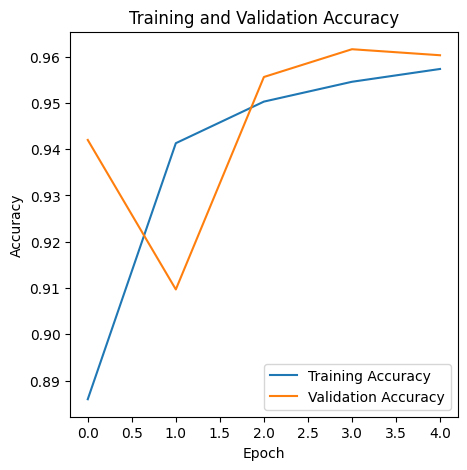

In [ ]:

import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



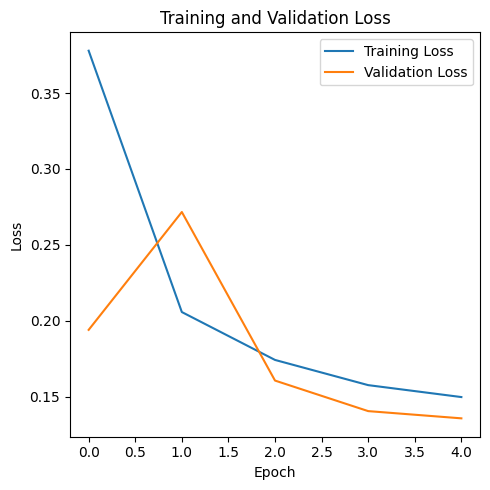

In [ ]:

plt.figure(figsize=(5, 5))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9534 - loss: 0.1596
Test Loss: 0.1356
Test Accuracy: 0.9603


In [ ]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


NameError: name 'class_names' is not defined

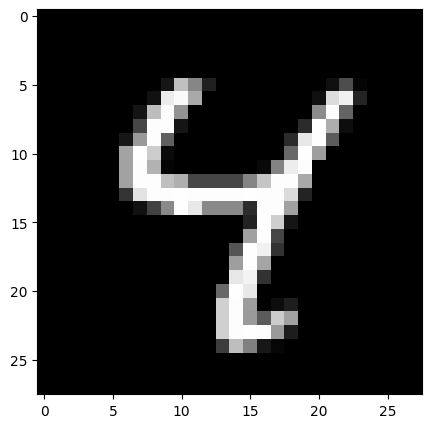

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

y_pred=np.argmax(y_pred,axis=1)
plt.figure(figsize=(5,5))
plt.imshow(x_test[6].reshape(28, 28),cmap='gray')
actual_label = np.argmax(y_test[6])
plt.title(f'Predicted : {class_names[[6]]} Actual : {class_names[actual_label]}')
plt.show()
